Experiment 1

In [ ]:
import matplotlib.pyplot as plt
f = int(input("Enter the frequency"))
c = 3*pow(10,8)
pi = 3.14
d = int(input("Enter the distance"))
result = []
distance = []
for i in range(0,d,2):
  FSPL = ((4*pi*f*i)/c)**2
  result.append(FSPL)
  distance.append(i)
print(f"The distance range is from 0 to {d}")
plt.plot(distance,result)
plt.xlabel("Distance")
plt.ylabel("FSPL")
plt.title("Free Space Path Loss vs Distance")


Experiment 2

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
threshold = 0.1
Poutref = 0.63
x = []
P_out_ray = []
for i in np.arange(0.01,0.9,0.01):
  x.append(i)
  P_out_ray.append(1 - math.exp(-threshold/i))

plt.plot(x,P_out_ray)
plt.xlabel("Average SNR")
plt.ylabel("Outage probability")
plt.title("Outage probability for rayleigh fading channel")
plt.axhline(Poutref,color="green",linestyle="--")


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

threshold = 0.1
Poutref = 0.63
k = 3
x = []
P_out_rician = []
for i in np.arange(0.01, 0.9, 0.01):
  x.append(i)
  gamma_avg = i
  P_out = (1 - math.exp(-threshold/gamma_avg))*math.exp(-k)
  P_out_rician.append(P_out)
plt.plot(x, P_out_rician)
plt.xlabel("Average SNR")
plt.ylabel("Outage probability")
plt.title("Outage probability for rician fading channel")
plt.axhline(Poutref, color="green", linestyle="--")

Experiment 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
num_samples = 100000
h_real = np.random.randn(num_samples)
h_imag = np.random.randn(num_samples)
h = h_real + 1j*h_imag
channel_gain = np.abs(h)**2
threshold_SNR_db = 5
threshold_SNR_linear = 10**(threshold_SNR_db/10)
average_SNR_db = 15
average_SNR_linear = 10**(average_SNR_db/10)
gamma = average_SNR_linear*channel_gain
count = 0
for i in range(num_samples):
  if gamma[i] < threshold_SNR_linear:
    count += 1
outage_probability = count/num_samples
print("Outage probability:", outage_probability)
Poutref = 1 - math.exp(-threshold_SNR_linear/gamma[i])
print("Poutref:", Poutref)

Outage probability: 0.04891
Poutref: 0.025097583832464077


Experiment 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_samples = 10000
delays = np.array([0, 20, 40, 60, 80])
powers_db = np.array([0, -3, -6, -9, -12])

# Power
powers_lin = 10 ** (powers_db / 10.0)
powers_lin /= np.sum(powers_lin)

h = np.zeros((num_samples, len(delays)), dtype=complex)
for i, P in enumerate(powers_lin):
    real = np.random.normal(0, np.sqrt(P/2), num_samples)
    imag = np.random.normal(0, np.sqrt(P/2), num_samples)
    h[:, i] = real + 1j * imag

pdp = np.mean(np.abs(h) ** 2, axis=0)
pdp /= np.sum(pdp)

plt.stem(delays, pdp, basefmt=" ")
plt.xlabel("Delay (ns)")
plt.ylabel("Normalized PDP")
plt.title("Power Delay Profile (PDP)")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = np.array([1, 2, 3, 4, 5, 6])  # Diversity orders
SNR_dB = np.linspace(0, 25, 1000)  # SNR from 0 to 25 dB
SNR_linear = 10 ** (SNR_dB / 10)

plt.figure(figsize=(8, 6))

for l in L:
    # Calculate BER for BPSK with L-branch MRC Rayleigh fading
    # Formula: Pb = 0.5 * (1 - sqrt(SNR/(1+SNR)))^L
    ber = 0.5 * (1 - np.sqrt(SNR_linear / (1 + SNR_linear))) ** l
    plt.semilogy(SNR_dB, ber, label=f"L={l}")

plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("SNR vs BER")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()
plt.ylim(1e-6, 1)
plt.show()


Experiment 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
EbN0_dB = np.arange(0, 21, 2)   # Eb/N0 range in dB
N_bits_list = [1000, 10000, 100000, 1000000]
ber_curves = []

plt.figure(figsize=(10, 6))

for N_bits in N_bits_list:
    ber_sim = []

    for ebn0 in EbN0_dB:
        bits = np.random.randint(0, 2, N_bits)
        x = 2 * bits - 1   # BPSK: 0→-1, 1→+1
        h = (np.random.randn(N_bits) + 1j * np.random.randn(N_bits)) / np.sqrt(2)
        EbN0 = 10 ** (ebn0 / 10)
        N0 = 1 / EbN0
        noise = (np.random.randn(N_bits) + 1j * np.random.randn(N_bits)) * np.sqrt(N0 / 2)
        y = h * x + noise
        y_eq = y / h
        bits_rx = np.real(y_eq) >= 0
        errors = np.sum(bits != bits_rx)
        ber_sim.append(errors / N_bits)
    ber_curves.append(ber_sim)
    plt.semilogy(EbN0_dB, ber_sim, marker='o', label=f"N_bits={N_bits}")

plt.grid(True, which='both')
plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER of BPSK (0→-1, 1→+1) over Rayleigh SISO for Different Number of Bits')
plt.legend()
plt.show()


Experiment 6

In [ ]:
import numpy as np, matplotlib.pyplot as plt
np.random.seed(0)
SNRdB = np.arange(0,21,2); SNR = 10**(SNRdB/10)
N = 100000                      # adjust for accuracy/speed
Nr_list = [1,2,3,4,5]
methods = ["MRC","EGC","SC"]

bits = np.random.randint(0,2,size=N); s = 2*bits-1

for method in methods:
    plt.figure(figsize=(6,4))
    for Nr in Nr_list:
        bers = []
        for snr in SNR:
            sigma = np.sqrt(1/(2*snr))
            h = (np.random.randn(N,Nr)+1j*np.random.randn(N,Nr))/np.sqrt(2)
            n = (np.random.randn(N,Nr)+1j*np.random.randn(N,Nr))*sigma
            r = h * s[:,None] + n

            if method=="MRC":
                y = np.sum(np.conj(h)*r,axis=1)
            elif method=="EGC":
                w = np.conj(h)/(np.abs(h)+1e-12)
                y = np.sum(w*r,axis=1)
            else:  # SC
                idx = np.argmax(np.abs(h)**2,axis=1)
                h_sc = h[np.arange(N),idx]; r_sc = r[np.arange(N),idx]
                y = np.conj(h_sc)*r_sc

            dec = (np.real(y)>0).astype(int)
            bers.append(np.mean(dec!=bits))
        plt.semilogy(SNRdB, bers, marker='o', label=f'Nr={Nr}')
    plt.title(f'{method} - SIMO BPSK Rayleigh'); plt.xlabel('SNR (dB)'); plt.ylabel('BER')
    plt.grid(True,which='both'); plt.legend(); plt.tight_layout()
plt.show()


Experiment 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_alamouti_ber(num_symbols, snr_db_range):
    """Simulate BER for Alamouti STBC over Rayleigh fading channel"""
    ber_values = []

    for snr_db in snr_db_range:
        snr_linear = 10**(snr_db / 10)
        noise_var = 1 / snr_linear

        # Generate bits and BPSK modulate
        bits = np.random.randint(0, 2, num_symbols * 2)
        symbols = 2 * bits - 1  # BPSK: 0→-1, 1→+1
        s = symbols.reshape(-1, 2)  # [s1, s2] pairs

        # Rayleigh fading channels (quasi-static)
        h1 = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols)) / np.sqrt(2)
        h2 = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols)) / np.sqrt(2)

        # Complex Gaussian noise
        noise = np.sqrt(noise_var/2) * (np.random.randn(num_symbols, 2) +
                                        1j*np.random.randn(num_symbols, 2))

        # Alamouti transmission (2 time slots)
        r1 = h1*s[:, 0] + h2*s[:, 1] + noise[:, 0]
        r2 = h1*(-np.conj(s[:, 1])) + h2*np.conj(s[:, 0]) + noise[:, 1]

        # Alamouti combining
        y1 = np.conj(h1)*r1 + h2*np.conj(r2)
        y2 = np.conj(h2)*r1 - h1*np.conj(r2)

        # Equalization
        channel_gain = np.abs(h1)**2 + np.abs(h2)**2
        s1_est = y1 / channel_gain
        s2_est = y2 / channel_gain

        # BPSK decision
        detected_symbols = np.stack([np.sign(np.real(s1_est)),
                                     np.sign(np.real(s2_est))], axis=1).flatten()
        detected_bits = ((detected_symbols + 1) / 2).astype(int)

        # Calculate BER
        ber = np.sum(detected_bits != bits) / len(bits)
        ber_values.append(ber)

    return np.array(ber_values)

# Configuration
sample_sizes = [10000, 100000, 1000000]
snr_range = np.arange(0, 11, 1)

plt.figure(figsize=(10, 5))

for num_samples in sample_sizes:
    print(f"Simulating {num_samples} symbols...")
    ber = simulate_alamouti_ber(num_samples, snr_range)
    plt.semilogy(snr_range, ber, '-o', label=f"Samples = {num_samples}")

plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER Performance of 2x1 MISO with Alamouti STBC (Rayleigh Fading)")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()


Experiment 8

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

Nt_values = [1, 2, 4]
Nr_values = [1, 2, 4]
SNR_dB_values = [0, 10, 15, 20, 25]
bandwidth = 1

capacity_results = {}
table_data = []

for Nt in Nt_values:
    for Nr in Nr_values:
        capacity_results[f'{Nt}x{Nr}'] = []
        for SNR_dB in SNR_dB_values:

            SNR_linear = 10**(SNR_dB / 10)
            N0 = 1
            P_total_over_N0 = SNR_linear
            H = (np.random.randn(Nr, Nt) + 1j * np.random.randn(Nr, Nt)) / np.sqrt(2)
            HH_conj_transpose = np.conj(H).T
            term = (P_total_over_N0 / Nt) * np.dot(H, HH_conj_transpose)
            Inr = np.eye(Nr)
            matrix_for_determinant = Inr + term
            det_matrix = np.linalg.det(matrix_for_determinant)
            C = bandwidth * math.log2(np.maximum(np.real(det_matrix), 1e-12))
            table_data.append([SNR_dB, Nt, Nr, f"{C:.4f}"])

df_capacity = pd.DataFrame(table_data, columns=["SNR (dB)", "Nt", "Nr", "Capacity (bits/s/Hz)"])
display(df_capacity)

Experiment 9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate channel capacity
def calculate_capacity(H, snr_linear, nt, nr):
    if nt == 1 and nr == 1:  # SISO
        return np.log2(1 + snr_linear * np.abs(H)**2)
    elif nt == 1 or nr == 1:  # SIMO or MISO
        return np.log2(1 + snr_linear * np.linalg.norm(H)**2)
    else:  # MIMO
        H_hermitian = H.conj().T
        I = np.eye(nr)
        det = np.linalg.det(I + (snr_linear / nt) * H @ H_hermitian)
        return np.real(np.log2(det))

# Simulation function
def simulate_capacity(nt, nr, snr_db_range, num_samples=2000):
    capacities = []

    for snr_db in snr_db_range:
        snr_linear = 10**(snr_db / 10)
        capacity_samples = []

        for _ in range(num_samples):
            # Generate random Rayleigh fading channel
            H = (np.random.randn(nr, nt) + 1j*np.random.randn(nr, nt)) / np.sqrt(2)
            capacity = calculate_capacity(H, snr_linear, nt, nr)
            capacity_samples.append(capacity)

        # Average capacity (ergodic capacity)
        capacities.append(np.mean(capacity_samples))

    return np.array(capacities)

# Configuration
configs = {
    'SISO (1x1)': (1, 1),
    'SIMO (1x2)': (1, 2),
    'MISO (2x1)': (2, 1),
    'MIMO (2x2)': (2, 2),
}

snr_range = np.arange(-10, 21, 1)

# Run simulations and plot
plt.figure(figsize=(10, 7))

for name, (nt, nr) in configs.items():
    print(f"Calculating {name}...")
    capacity = simulate_capacity(nt, nr, snr_range)
    plt.plot(snr_range, capacity, marker='o', markersize=4, linestyle='--', label=name)

plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Ergodic Channel Capacity (bits/s/Hz)', fontsize=12)
plt.title('Ergodic Channel Capacity vs. SNR', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()


Experiment 10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Modulation
def modulate(bits, mod_type):
    if mod_type == 'BPSK':
        return 2*bits - 1
    elif mod_type == 'QPSK':
        return ((2*bits[0::2]-1) + 1j*(2*bits[1::2]-1)) / np.sqrt(2)

# Demodulation
def demodulate(symbols, mod_type):
    if mod_type == 'BPSK':
        return (np.real(symbols) > 0).astype(int)
    elif mod_type == 'QPSK':
        bits = np.zeros(2*len(symbols), int)
        bits[0::2] = np.real(symbols) > 0
        bits[1::2] = np.imag(symbols) > 0
        return bits

# Maximum Likelihood Detector
def ml_detector(received, channel, constellation):
    Nt = channel.shape[1]
    # All possible symbol combinations
    all_combos = np.array(list(product(constellation, repeat=Nt)))
    # Expected received signals
    expected = channel @ all_combos.T
    # Find minimum distance
    distances = np.sum(np.abs(received[:, None] - expected)**2, axis=0)
    return all_combos[np.argmin(distances)]

# Simulation
def simulate_ber(Nt, Nr, mod_type, snr_db, num_symbols=200):
    bits_per_symbol = {'BPSK': 1, 'QPSK': 2}[mod_type]

    # Generate constellation points
    constellation_bits = np.array(list(product([0, 1], repeat=bits_per_symbol))).flatten()
    constellation = np.unique(modulate(constellation_bits, mod_type))

    ber_list = []
    for snr in snr_db:
        snr_linear = 10**(snr/10)
        noise_var = Nt / snr_linear
        errors, total = 0, 0

        for _ in range(num_symbols):
            # Generate bits and modulate
            bits = np.random.randint(0, 2, Nt * bits_per_symbol)
            symbols = modulate(bits, mod_type)

            # Rayleigh channel + noise
            H = (np.random.randn(Nr, Nt) + 1j*np.random.randn(Nr, Nt)) / np.sqrt(2)
            noise = (np.random.randn(Nr) + 1j*np.random.randn(Nr)) * np.sqrt(noise_var/2)
            received = H @ symbols + noise

            # Detect and demodulate
            detected = ml_detector(received, H, constellation)
            detected_bits = demodulate(detected, mod_type)

            # Count errors
            errors += np.sum(bits != detected_bits)
            total += len(bits)

        ber_list.append(errors / total)
    return np.array(ber_list)

# Run simulation
snr_range = np.arange(0, 21, 2)
configs = [('BPSK', 2, 2), ('BPSK', 4, 4), ('QPSK', 2, 2), ('QPSK', 4, 4)]

plt.figure(figsize=(10, 6))
for mod_type, Nt, Nr in configs:
    print(f"Running {mod_type} {Nt}x{Nr}...")
    ber = simulate_ber(Nt, Nr, mod_type, snr_range)
    plt.semilogy(snr_range, ber, marker='o', label=f"{mod_type} {Nt}x{Nr}")

plt.title("MIMO BER Performance with ML Detection")
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



Experiment 11

Simulating 2x2...
Simulating 2x3...
Simulating 4x4...
Simulating 4x3...
Simulating 4x6...


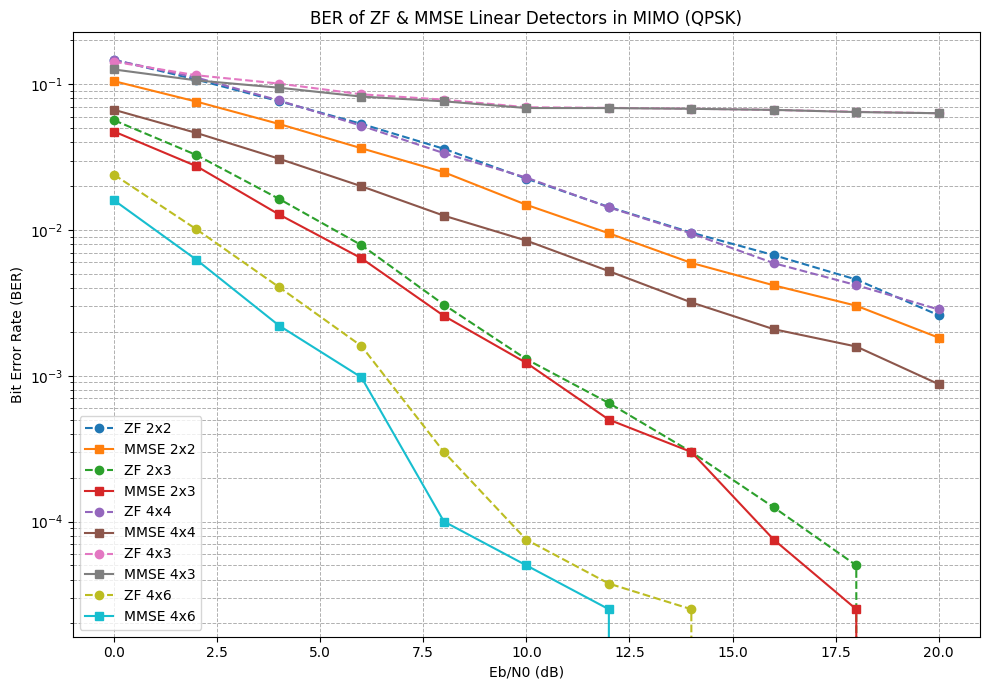

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Modulation (QPSK)
def modulate(bits):
    bits = bits.reshape((-1, 2))
    symbols = (1 - 2*bits[:, 0]) + 1j*(1 - 2*bits[:, 1])
    return symbols / np.sqrt(2)

# Demodulation (QPSK)
def demodulate(symbols):
    bit0 = (symbols.real < 0).astype(int)
    bit1 = (symbols.imag < 0).astype(int)
    return np.stack((bit0, bit1), axis=1).reshape(-1)

# Simulation function
def simulate_linear_detectors(Nt, Nr, snr_db, num_symbols=10000):
    bits_per_symbol = 2  # QPSK
    ber_zf, ber_mmse = [], []

    for snr in snr_db:
        # Calculate noise variance
        snr_linear = 10**(snr/10)
        N0 = 1 / (snr_linear * bits_per_symbol)
        noise_std = np.sqrt(N0 / 2)

        errors_zf, errors_mmse, total_bits = 0, 0, 0

        for _ in range(num_symbols):
            # Generate bits and modulate
            bits = np.random.randint(0, 2, Nt * bits_per_symbol)
            symbols = modulate(bits).reshape(Nt, 1)

            # Rayleigh fading channel
            H = (np.random.randn(Nr, Nt) + 1j*np.random.randn(Nr, Nt)) / np.sqrt(2)

            # Add noise
            noise = noise_std * (np.random.randn(Nr, 1) + 1j*np.random.randn(Nr, 1))
            received = H @ symbols + noise

            # Zero Forcing (ZF) Detection
            W_zf = np.linalg.pinv(H)
            detected_zf = W_zf @ received
            bits_zf = demodulate(detected_zf.flatten())

            # MMSE Detection
            H_hermitian = np.conjugate(H.T)
            W_mmse = np.linalg.inv(H_hermitian @ H + N0*np.eye(Nt)) @ H_hermitian
            detected_mmse = W_mmse @ received
            bits_mmse = demodulate(detected_mmse.flatten())

            # Count errors
            errors_zf += np.sum(bits != bits_zf)
            errors_mmse += np.sum(bits != bits_mmse)
            total_bits += len(bits)

        ber_zf.append(errors_zf / total_bits)
        ber_mmse.append(errors_mmse / total_bits)

    return np.array(ber_zf), np.array(ber_mmse)

# Configuration
configs = [(2, 2), (2, 3), (4, 4), (4, 3), (4, 6)]
snr_range = np.arange(0, 21, 2)

plt.figure(figsize=(10, 7))

# Run simulations
for Nt, Nr in configs:
    print(f"Simulating {Nt}x{Nr}...")
    ber_zf, ber_mmse = simulate_linear_detectors(Nt, Nr, snr_range)

    plt.semilogy(snr_range, ber_zf, 'o--', label=f'ZF {Nt}x{Nr}')
    plt.semilogy(snr_range, ber_mmse, 's-', label=f'MMSE {Nt}x{Nr}')

plt.title('BER of ZF & MMSE Linear Detectors in MIMO (QPSK)')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()
